In [3]:
#install.packages("devtools",repos='http://cran.us.r-project.org')

In [4]:
#install.packages("devtools")
#devtools::install_github("ndphillips/yarrr", 
   #                      build_vignettes = TRUE)

In [18]:
#conda install r-SentimentAnalysis

In [135]:
library(tidyverse) 
library(dplyr)
library(tidytext) #Text mining
library(tidyr)
#library(widyr)
library(NLP)
#library(tm)
#library("SnowballC")
library(RColorBrewer)
library(wordcloud)
#library(RCurl)
#library(SentimentAnalysis)
library(plotly)
library(tm)
library(tidyverse)
library(tidytext)
library(glue)
library(stringr)
library(yarrr)

ERROR: Error in library(yarrr): there is no package called ‘yarrr’


In [6]:
#getwd()

### 1. Reading the data

In [3]:
#reading data from folder 'Apps'
my.data.app<-readRDS("09_week32uk_app.rds")

In [4]:
str(my.data.app)

Classes ‘data.table’ and 'data.frame':	1192589 obs. of  23 variables:
 $ developer_id        : chr  NA NA NA NA ...
 $ privacy_policy_id   : chr  NA NA NA NA ...
 $ num_downloads_class : chr  NA NA NA NA ...
 $ name                : chr  NA NA NA NA ...
 $ content_rating_app  : chr  NA NA NA NA ...
 $ category            : chr  NA NA NA NA ...
 $ top_in_app          : chr  NA NA NA NA ...
 $ top_has_ads         : chr  NA NA NA NA ...
 $ price               : chr  NA NA NA NA ...
 $ operating_system    : chr  NA NA NA NA ...
 $ software_version    : chr  NA NA NA NA ...
 $ interactive_element : chr  NA NA NA NA ...
 $ in_app_product      : chr  NA NA NA NA ...
 $ nb_screenshots      : chr  NA NA NA NA ...
 $ description         : chr  NA NA NA NA ...
 $ whats_new           : chr  NA NA NA NA ...
 $ top_editor_choice   : chr  NA NA NA NA ...
 $ top_family_library  : chr  NA NA NA NA ...
 $ period              : chr  "09_week32" "09_week32" "09_week32" "09_week32" ...
 $ initial_release_d

In [5]:
#glimpse(my.data.app)

In [6]:
#Reading data from folder Ratings
my.data.rat<-readRDS("09_week32uk_rati.rds")

In [7]:
str(my.data.rat)

Classes ‘data.table’ and 'data.frame':	1192589 obs. of  8 variables:
 $ nb_rating: num  NA NA NA NA NA NA NA NA NA NA ...
 $ rating_5 : num  NA NA NA NA NA NA NA NA NA NA ...
 $ rating_4 : num  NA NA NA NA NA NA NA NA NA NA ...
 $ rating_3 : num  NA NA NA NA NA NA NA NA NA NA ...
 $ rating_2 : num  NA NA NA NA NA NA NA NA NA NA ...
 $ rating_1 : num  NA NA NA NA NA NA NA NA NA NA ...
 $ period   : chr  "09_week32" "09_week32" "09_week32" "09_week32" ...
 $ my_app_id: chr  "app_00000001" "app_00000002" "app_00000003" "app_00000004" ...
 - attr(*, ".internal.selfref")=<externalptr> 


For this week, we have 1,192,589 observations on each table

In [8]:
#reading data from folder 'Revenue'
my.data.rev<-readRDS("09_week32uk_rev.rds")
str(my.data.rev)

Classes ‘data.table’ and 'data.frame':	1194541 obs. of  5 variables:
 $ my_app_id   : chr  "app_00000001" "app_01184968" "app_01189001" "app_01187897" ...
 $ downloads   : int  NA NA NA NA NA NA NA NA NA NA ...
 $ active_users: int  NA NA NA NA NA NA NA NA NA NA ...
 $ my_revenue  : num  NA NA NA NA NA NA NA NA NA NA ...
 $ period      : chr  "09_week32" "09_week32" "09_week32" "09_week32" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [9]:
length(my.data.rev$downloads[my.data.rev$downloads=='NA'])

[1] 1149435

In [10]:
#count(my.data.rev,downloads)

### 2. Joining all


In [16]:
join1<-inner_join(my.data.app,my.data.rat,by='my_app_id',copy=TRUE )

In [15]:
#join =  my.data.app %>% inner_join(my.data.rat,by='my_app_id')

In [17]:
join2<-inner_join(join1,my.data.rev,by='my_app_id',copy=TRUE )

In [18]:
head(join2)

developer_id,privacy_policy_id,num_downloads_class,name,content_rating_app,category,top_in_app,top_has_ads,price,operating_system,...,rating_5,rating_4,rating_3,rating_2,rating_1,period.y,downloads,active_users,my_revenue,period
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,09_week32,NA,NA,NA,09_week32
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,09_week32,NA,NA,NA,09_week32
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,09_week32,NA,NA,NA,09_week32
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,09_week32,NA,NA,NA,09_week32
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,09_week32,NA,NA,NA,09_week32
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,09_week32,NA,NA,NA,09_week32


 ### 3. Cleaning

In [19]:
#droping NA
new_app1<-drop_na(join2,description)

In [20]:
#droping NA
new_app2<-drop_na(new_app1,downloads)

In [21]:
str(new_app2)

'data.frame':	44571 obs. of  34 variables:
 $ developer_id        : chr  "8202756898217994038" "ChirpApps" "SkyTest%C2%AE" "SkyTest%C2%AE" ...
 $ privacy_policy_id   : chr  "http://www.automateitapp.com/privacy.html" "http://chirpapps.com/Privacy.htm" "http://www.skytest.com/terms.htm" "http://www.skytest.com/terms.htm" ...
 $ num_downloads_class : chr  "50,000+" "1,000,000+" "500+     >" "500+     >" ...
 $ name                : chr  "AutomateIt Pro - Easy task automation for Android - Apps on Google Play" "Calculator - Apps on Google Play" "SkyTest BU/GU Lite - Apps on Google Play" "SkyTest BU/GU Lite - Apps on Google Play" ...
 $ content_rating_app  : chr  "PEGI 3   Learn More" "PEGI 3   Learn More" "PEGI 3   Learn More" "PEGI 3   Learn More" ...
 $ category            : chr  "Productivity" "Communication" "Business" "Business" ...
 $ top_in_app          : chr  "FALSE" "FALSE" "FALSE" "FALSE" ...
 $ top_has_ads         : chr  "FALSE" "TRUE" "FALSE" "FALSE" ...
 $ price              

### 4. Final dataset

In [22]:
data<- new_app2

#### ideas

In [ ]:
#library(tidyverse)
#unique(data$price)

In [ ]:
count(data,num_downloads_class)
#we would need to recategorize this thing. It´s too much, discard this variable

In [ ]:
#apps for free
length(data$price[data$price=='0'])
    #the number of free apps it´s very high so we are going to use it. 

In [23]:
data = data[which(data$price==0),]
str(data)
#getting only the apps for free
# now we only have 33k

'data.frame':	33602 obs. of  34 variables:
 $ developer_id        : chr  "ChirpApps" "KOREAN+AIR+LINES.CO.,+LTD." "Shibby+Developments" "ING+Belgium+NV" ...
 $ privacy_policy_id   : chr  "http://chirpapps.com/Privacy.htm" "https://www.koreanair.com/global/en/footers/Privacy-Policy.html" "KO" "http://www.ing.be/mobileprivacyen" ...
 $ num_downloads_class : chr  "1,000,000+" "1,000,000+" "100,000+" "1,000,000+" ...
 $ name                : chr  "Calculator - Apps on Google Play" "Korean Air - Apps on Google Play" "Astro Panel (Astronomy) - Apps on Google Play" "ING Smart Banking - Apps on Google Play" ...
 $ content_rating_app  : chr  "PEGI 3   Learn More" "PEGI 3   Learn More" "PEGI 3   Learn More" "PEGI 3   Learn More" ...
 $ category            : chr  "Communication" "Travel &amp; Local" "Weather" "Finance" ...
 $ top_in_app          : chr  "FALSE" "FALSE" "FALSE" "FALSE" ...
 $ top_has_ads         : chr  "TRUE" "FALSE" "FALSE" "FALSE" ...
 $ price               : chr  "0" "0" "0" "0"

### 5. Sample of data = 'app200'

In [24]:
app200<-sample_n(data,200)
head(app200)

developer_id,privacy_policy_id,num_downloads_class,name,content_rating_app,category,top_in_app,top_has_ads,price,operating_system,...,rating_5,rating_4,rating_3,rating_2,rating_1,period.y,downloads,active_users,my_revenue,period
7670331570699900357,http://libiitech.com/?page_id=746,"500,000+",High School Life: Sister Party - Apps on Google Play,PEGI 3 Learn More,Educational,TRUE,TRUE,0,3.0 and up,...,4226,841,760,250,670,09_week32,31,289,30.611204,09_week32
Sage+Global+Services+Ltd,https://www.sage.com/company/privacy-policy-and-cookies,"5,000+",Sage - Accounting - Apps on Google Play,PEGI 3 Learn More,Business,FALSE,FALSE,0,5.0 and up,...,33,15,22,4,27,09_week32,367,21043,0.000000,09_week32
5644820617218674509,https://aviary.com/legal/privacy,"50,000,000+",Photo Editor by Aviary - Apps on Google Play,PEGI 3 Learn More,Photography,TRUE,FALSE,0,4.1 and up,...,1021402,263254,102535,41021,62524,09_week32,4237,253193,17.639222,09_week32
thema,http://www.themaapps.com/privacy-policy/,"50,000+",Racing Watch Face - Apps on Google Play,PEGI 3 Learn More,Personalization,TRUE,TRUE,0,Varies with device,...,206,72,26,8,22,09_week32,49,2223,17.197907,09_week32
Twinkl,http://www.twinkl.co.uk/privacy-policy,"1,000+",Twinkl Augmented Reality - Apps on Google Play,PEGI 3 Learn More,Education,FALSE,FALSE,0,4.1 and up,...,13,0,0,1,4,09_week32,88,913,0.000000,09_week32
Weather+Widget+Theme+Dev+Team,http://www.amberweather.com/privacy-policy.txt,"500,000+",Daily Weather Live Widget - Apps on Google Play,PEGI 3 Learn More,Weather,FALSE,TRUE,0,4.1 and up,...,3802,962,387,81,163,09_week32,523,27280,2.340306,09_week32


### Histogram of ratings

In [25]:
#update.packages("ggplot2")
library(plotly)
#packageVersion('plotly')

In [ ]:
#library(dplyr)

p1 <- plot_ly(app200, x = ~rating_5) %>% add_histogram(name = "Rating 5")
p2 <- plot_ly(app200, x = ~rating_4) %>% add_histogram(name = "Rating 4")
p3 <- plot_ly(app200, x = ~rating_3) %>% add_histogram(name = "Rating 3")
p4 <- plot_ly(app200, x = ~rating_2) %>% add_histogram(name = "Rating 2")
p5 <- plot_ly(app200, x = ~rating_1) %>% add_histogram(name = "Rating 1")

subplot(p1, p2,p3,p4,p5) #%>% hide_legend()



### 6. Sentiment Analysis


In [27]:
#unfortunately we cannot use the package SentimentAnalysis in Jupyter. But we can work with other packages.
#library(SentimentAnalysis)
#sentiment<- analyzeSentiment(app200$description)
#sentiment

In [28]:
# Load dplyr and tidytext
library(dplyr)
library(tidytext)

# Choose the bing lexicon
#get_sentiments("bing")
get_sentiments("bing")

# Choose the nrc lexicon
get_sentiments("nrc") %>%
  count(sentiment) # Count words by sentiment

word,sentiment
2-faced,negative
2-faces,negative
a+,positive
abnormal,negative
abolish,negative
abominable,negative
abominably,negative
abominate,negative
abomination,negative
abort,negative


sentiment,n
anger,1247
anticipation,839
disgust,1058
fear,1476
joy,689
negative,3324
positive,2312
sadness,1191
surprise,534
trust,1231


#### - Cleaning 

In [44]:
doc <- VectorSource(app200$description)
str(doc)

List of 200
 $ encoding: chr "Who says high school life is all about studying? It is actually more wonderful than you can imagine. Come find "| __truncated__
 $ length  : chr "Accounting makes it easy to run your business on the go. Reducing time on admin with simple Invoices, Quotes &a"| __truncated__
 $ position: chr "\"A one-stop shop for any photo editing need.\" -Mashable  \"A very comprehensive photo editor and pretty much "| __truncated__
 $ reader  : chr "Racing Watch Face for Wear OS!   !! NOT FOR SAMSUNG GEAR S2 NOR GEAR S3 !! (running Tizen OS) You can find the "| __truncated__
 $ content : chr "Twinkl Augmented Reality is a unique experience that transforms Twinkl content, bringing our stories and resour"| __truncated__
 $ NA: chr "This clock and weather app with widget is here waiting for you!    This widget is a full featured,  completely "| __truncated__
 $ NA: chr "This is simply the best weather app for your region... and the rest of the world.   - Gorgeous and realist

In [99]:
clean <- function(x){
            x <-tolower(x)
            x <-removeWords(x,stopwords('en'))
            x <-removePunctuation(x)
            x <-removeWords(x, c("amp", "&","\\|", "★"))
            x <-stripWhitespace(x)
         return(x)}
doc1 = clean(doc)

In [100]:
str(doc1)

 chr [1:5] "" "200" "0" ...


#### - DTM

In [101]:
corpus <- VCorpus(VectorSource(doc1))
glimpse(corpus)

List of 5
 $ 1:List of 2
  ..$ content: chr ""
  ..$ meta   :List of 7
  .. ..$ author       : chr(0) 
  .. ..$ datetimestamp: POSIXlt[1:1], format: "2019-10-26 16:29:12"
  .. ..$ description  : chr(0) 
  .. ..$ heading      : chr(0) 
  .. ..$ id           : chr "1"
  .. ..$ language     : chr "en"
  .. ..$ origin       : chr(0) 
  .. ..- attr(*, "class")= chr "TextDocumentMeta"
  ..- attr(*, "class")= chr [1:2] "PlainTextDocument" "TextDocument"
 $ 2:List of 2
  ..$ content: chr "200"
  ..$ meta   :List of 7
  .. ..$ author       : chr(0) 
  .. ..$ datetimestamp: POSIXlt[1:1], format: "2019-10-26 16:29:12"
  .. ..$ description  : chr(0) 
  .. ..$ heading      : chr(0) 
  .. ..$ id           : chr "2"
  .. ..$ language     : chr "en"
  .. ..$ origin       : chr(0) 
  .. ..- attr(*, "class")= chr "TextDocumentMeta"
  ..- attr(*, "class")= chr [1:2] "PlainTextDocument" "TextDocument"
 $ 3:List of 2
  ..$ content: chr "0"
  ..$ meta   :List of 7
  .. ..$ author       : chr(0) 
  .. ..$ da

In [102]:
dtm <- TermDocumentMatrix(corpus)

In [103]:
inspect(dtm)

<<TermDocumentMatrix (terms: 8017, documents: 5)>>
Non-/sparse entries: 8020/32065
Sparsity           : 80%
Maximal term length: 76
Weighting          : term frequency (tf)
Sample             :
       Docs
Terms   1 2 3 4   5
  app   0 0 0 0 344
  can   0 0 0 0 295
  free  0 0 0 0 209
  game  0 0 0 0 267
  games 0 0 0 0 143
  get   0 0 0 0 139
  new   0 0 0 0 136
  play  0 0 0 0 151
  read  0 0 0 0 244
  will  0 0 0 0 260


In [104]:
m <- as.matrix(dtm)
v <- sort(rowSums(m),decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)
head(d, 10)

,word,freq
app,app,344
can,can,295
game,game,267
will,will,260
read,read,244
free,free,209
play,play,151
games,games,143
get,get,139
new,new,136


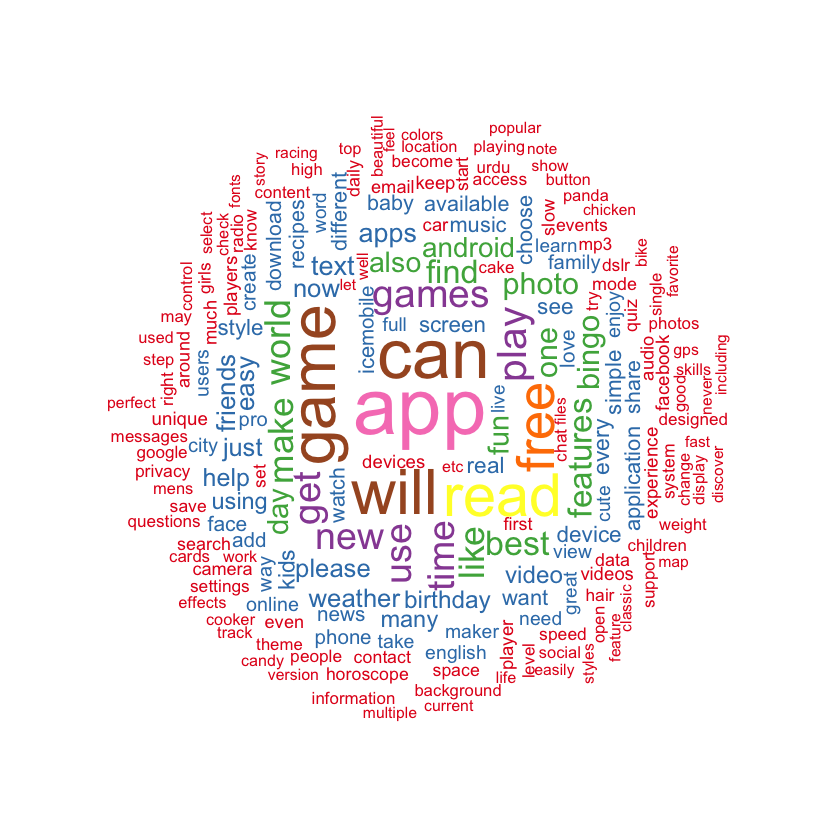

In [105]:
set.seed(1234)
res=wordcloud(words = d$word, freq = d$freq, min.freq = 1,
          max.words=200, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Set1"))

In [67]:
tdm <- dtm
freqTable <- d

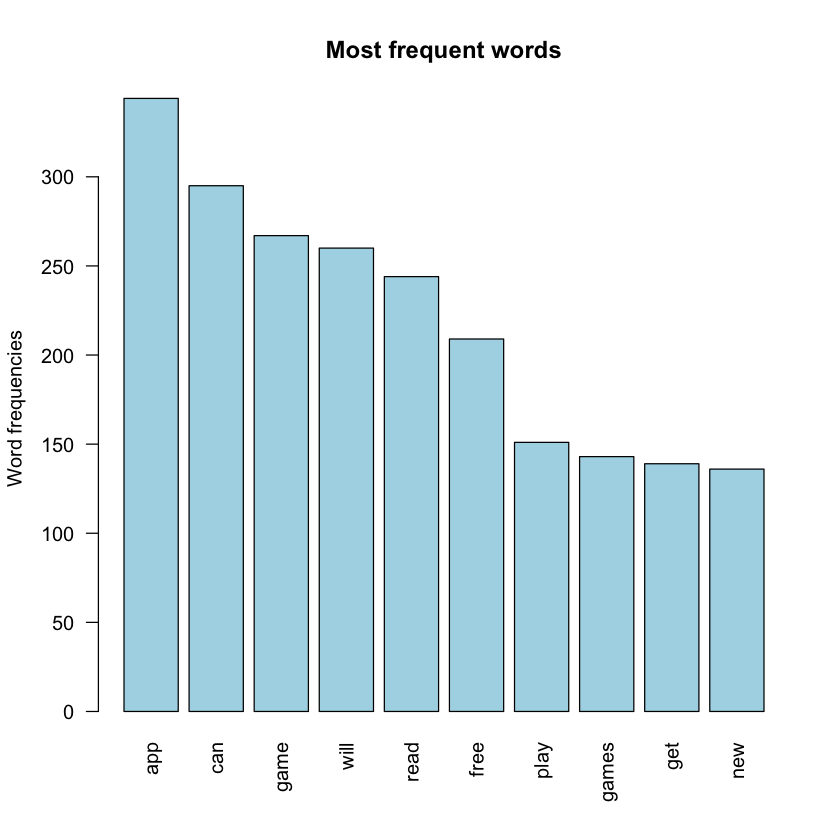

In [68]:
# Bar plot of the frequency for the top10
barplot(freqTable[1:10,]$freq, las = 2, 
        names.arg = freqTable[1:10,]$word,
        col ="lightblue", main ="Most frequent words",
        ylab = "Word frequencies")

#### - By category

In [90]:
#unique(app200$category)

In [95]:
#count(app200,category)
count(app200,category)

category,n
Action,3
Action &amp; Adventure,4
Adventure,2
Arcade,5
Art &amp; Design,2
Auto &amp; Vehicles,6
Beauty,5
Board,6
Books &amp; Reference,4
Brain Games,2


In [96]:
#categories ####no
library(dplyr)
categories <- app200 %>%
  group_by(category) %>%
  mutate(line = row_number()) %>%
  ungroup()
#glimpse(categories)

In [113]:
bycategory = app200 %>% 
                group_by(category,description) %>% summarise(numberApps= n() )
                #%>% mutate(count(my_app_id)) )
               # %>% summarise(avgrat=mean(rating_5,rating_4,rating_3,rating_2,rating_1)))
glimpse(bycategory)
head(bycategory)

Observations: 200
Variables: 3
Groups: category [53]
$ category    <chr> "Action", "Action", "Action", "Action &amp; Adventure", "…
$ description <chr> "In Ninja Tobu, speed and accuracy are key, as you guide …
$ numberApps  <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …


category,description,numberApps
Action,"In Ninja Tobu, speed and accuracy are key, as you guide your ninja through platforms, enemies, and spikes! Tap and drag from anywhere on the screen to power your ninja jump, then let go to shoot through the air. Aim for any surface not covered in spikes and you'll stick to it like glue; ready to go again. Master the double jump, slow motion and slamming into enemies for extra points. Play the Challenges mode where you have to navigate many different levels that feature coins and chest rewards. Collect coins to unlock new ninjas with different abilities, effects and accessories. If you are good enough, you'll unlock an achievement, or even make it on to the leader board! Read more",1
Action,Play against other savages online! Join the battle now! BarbarQ is a brand new real-time multi-player pixel art style io game. Now come to build a perfect team with your friends to beat other savages in the arena! Eat mushroom to grow and loot others to get stronger. Beat your opponents to earn the highest score. Fight till the last second and win the battle! Official Facebook Fanspage https://www.facebook.com/BarbarQ/ [Game Features]: 1. Innovative&amp;addictive gameplay 2. Simple game control with joystick 3. Pixel art game design 4. Beat opponents with strategies and teamwork 5. Competitive mode with ladder system Read more,1
Action,"Take to the skies in a slick redux of sidescrollng air combat games! Fly classic warplanes to strafe, bomb, and shoot down your opponents, and command your forces across Europe in the expansive campaign mode. Fly historic fighters and bombers like the Sopwith Camel, Handley Page Type O, and Airco DH.2 through 20 perilous missions, survival mode, and campaign mode! Take down trucks, tanks, fighters, bombers, balloons, bunkers and more over five diverse battlefields. Your experience matters to us! After playing the game, give us feedback either in a review, by email, or on our website to let us know what you think, so together we can make the game better! Visit our forums! http://bombsightgames.com/forum/ Read more",1
Action &amp; Adventure,"Free Hippo games are renewed with an exciting shooter for all the family! Mischief Ji with his air balloons went with Uncle Dragon to an abandoned house near a road. There he filled balloons with water and started throwing them at pedestrians! What a disaster! What should we do now?! Who could help us to avoid troubles? Citizens of Hippo town urgently need help! As well as you have already understood, our games for boys and girls are renewed with a very interesting new game. A funny shooter! Younger brother of Hippy will throw down the balloons full of water, and we will open umbrellas of pedestrians, to make the balloons fall onto them. There are amusing jokes, funny heroes and very hilarious situations. The game will be much more funnier when hilarious firefighters will join the game. At this moment shooter will be much more interesting! Firefighters will teach mischief a good lesson, they will catch balloons with trampoline and throw them back at Ji and Uncle Dragon. Free family Hippy games will give a good mood and a lot of positive emotions to your child. But don't think that our shooter is too easy. Jokes aside, but Ji is getting faster and faster and will be throwing balloons more and more often with every minute. And also there will be more and more pedestrians at the streets. And if at the beginning of the game it is very easy to cope with water bombs, after a minute you will not have a free second! This game, that seems to be very easy, needs a lot of attention, concentration and good reaction from you and your kid. It means, that attention, concentration, reaction and coordination will be developed very fast and with a good quality. Try our new game from the series of free educational games for all the family. Curious Hippy is waiting for you! Have a lot of positive emotions with your child! Stay tuned and stay with us. Our

In [125]:
tidy_app <- app200 %>% select(description, num_downloads_class,name,category, my_app_id,nb_rating,
                            rating_5,rating_4,rating_3,rating_2,rating_1,downloads,active_users)
glimpse(tidy_app)
class(app200)
class(tidy_app)

Observations: 200
Variables: 13
$ description         <chr> "Who says high school life is all about studying?…
$ num_downloads_class <chr> "500,000+", "5,000+", "50,000,000+", "50,000+", "…
$ name                <chr> "High School Life: Sister Party - Apps on Google …
$ category            <chr> "Educational", "Business", "Photography", "Person…
$ my_app_id           <chr> "app_00565947", "app_00762243", "app_00229824", "…
$ nb_rating           <dbl> 6747, 101, 1490736, 334, 18, 5395, 5870, 23414, 2…
$ rating_5            <dbl> 4226, 33, 1021402, 206, 13, 3802, 3807, 14711, 13…
$ rating_4            <dbl> 841, 15, 263254, 72, 0, 962, 1523, 3150, 4042, 77…
$ rating_3            <dbl> 760, 22, 102535, 26, 0, 387, 250, 1734, 1783, 362…
$ rating_2            <dbl> 250, 4, 41021, 8, 1, 81, 103, 784, 731, 741, 1, 5…
$ rating_1            <dbl> 670, 27, 62524, 22, 4, 163, 187, 3035, 1704, 1298…
$ downloads           <int> 31, 367, 4237, 49, 88, 523, 22, 5, 48, 9916, 16, …
$ active_users      

[1] "data.frame"

[1] "data.frame"

In [126]:
category_tidy <- tidy_app %>%
  unnest_tokens(word, description) %>% #Break the description into individual words
 # filter(!word %in% undesirable_words) %>% #Remove undesirables
  filter(!nchar(word) < 3) %>% 
  anti_join(stop_words) #Data provided by the tidytext package

Joining, by = "word"


In [127]:
glimpse(category_tidy)

Observations: 29,868
Variables: 13
$ num_downloads_class <chr> "500,000+", "500,000+", "500,000+", "500,000+", "…
$ name                <chr> "High School Life: Sister Party - Apps on Google …
$ category            <chr> "Educational", "Educational", "Educational", "Edu…
$ my_app_id           <chr> "app_00565947", "app_00565947", "app_00565947", "…
$ nb_rating           <dbl> 6747, 6747, 6747, 6747, 6747, 6747, 6747, 6747, 6…
$ rating_5            <dbl> 4226, 4226, 4226, 4226, 4226, 4226, 4226, 4226, 4…
$ rating_4            <dbl> 841, 841, 841, 841, 841, 841, 841, 841, 841, 841,…
$ rating_3            <dbl> 760, 760, 760, 760, 760, 760, 760, 760, 760, 760,…
$ rating_2            <dbl> 250, 250, 250, 250, 250, 250, 250, 250, 250, 250,…
$ rating_1            <dbl> 670, 670, 670, 670, 670, 670, 670, 670, 670, 670,…
$ downloads           <int> 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 3…
$ active_users        <int> 289, 289, 289, 289, 289, 289, 289, 289, 289, 289,…
$ word           

In [128]:
word_summary <- category_tidy %>%
  #mutate(decade = ifelse(is.na(decade),"NONE", decade)) %>%
  group_by(category, my_app_id) %>%
  mutate(word_count = n_distinct(word)) %>%
  select(my_app_id, Category = category, word_count) %>%
  distinct() %>% #To obtain one record per song
  ungroup()